<!-- # Exercise: Experiment Tracking with Weights & Biases -->


<!-- `#scikit-learn` `#model-evaluation` `#experiment-tracking` `#weights-and-biases` -->


<!-- > Objectives:
>
> - Integrate W&B with a SciKit-Learn model development cycle.
> - Track model performance metrics.
> - Visualize results using W&B's dashboard.
> - Explore W&B's dashboard for interactive analysis and insights. -->


<!-- ## Standard Deep Atlas Exercise Set Up -->


<!-- - [x] Ensure you are using the coursework Pipenv environment and kernel ([instructions](../SETUP.md))
- [x] Apply the standard Deep Atlas environment setup process by running this cell: -->


In [85]:
import sys, os
sys.path.insert(0, os.path.join('..', 'includes'))

import deep_atlas
from deep_atlas import FILL_THIS_IN
deep_atlas.initialize_environment()
if deep_atlas.environment == 'COLAB':
    %pip install -q python-dotenv==1.0.0

🎉 Running in a Virtual environment


<!-- ## 🚦 Checkpoint: Start -->


<!-- - [x] Run this cell to record your start time: -->


In [86]:
deep_atlas.log_start_time()

🚀 Success! Get started...


<!-- --- -->

<!-- ## Context -->


<!-- Experiment tracking is crucial in machine learning to understand model performance, manage hyperparameters, and ensure reproducibility.

Weights & Biases (W&B) is a tool that facilitates this process by providing robust tracking, visualization, and collaboration features.

- [x] Sign up for an account at [wandb.ai](https://wandb.ai/). -->


<!-- ## Imports -->


In [87]:
import wandb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

<!-- ## Data Preparation -->


<!-- - [x] Load the Iris dataset and split it into training and test sets:
  - The Iris flower dataset is a common test dataset for classification experiments. The features are petal and sepal lengths and widths and the classes are three iris species. -->


In [88]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<!-- ## Initialize Weights & Biases -->


<!-- Initializing a W&B run is the first step in logging and tracking experiment details. This process involves setting up a session where you can log hyperparameters, metrics, and visualize the results in real time. Each experiment should start with `wandb.init()` to ensure data integrity and proper resource management.

- [x] Run the following command to log into your W&B account.
  - This will prompt you to enter your W&B API key, which you can find in your W&B account settings. -->


In [89]:
wandb.login()

True

<!-- - [x] Navigate to your W&B account settings to find your API key. Copy and paste it into the prompt when requested.

- [x] Start a new W&B run:
  - Once the _run_ is initiated, you can log any number of configuration parameters, events, and artifacts before finishing the run. Just make sure to _finish_ the run before changing values, restarting training, etc. -->


In [90]:
wandb.init(project="experiment-tracking-example_2", name="decision-tree-iris_2")

wandb: WARNING Ignored wandb.init() arg project when running a sweep.


<!-- The `config` object in Weights & Biases allows you to log hyperparameters and other configuration details that define your experiment. This makes it easier to reproduce experiments and compare results across different runs.

- [ ] Log experiment configuration:
  - The config object should be a dictionary
  - The key-value pairs can be arbitrary — you will likely want to store the value of any hyperparameters that you are experimenting with here.
    - Start with the model type (DecisionTree), random_state seed (any integer), and max depth of the tree estimator (3). -->


In [91]:
wandb.config = {"model_type": "DecisionTree",
                "random_state": 42,
                "max_depth": 3}

<!-- <details>
<summary>Solution:</summary>

```python
wandb.config = {
    "model_type": "DecisionTree",
    "random_state": 42,
    "max_depth": 3,
}
```

</details> -->


<!-- ## Model Training -->


<!-- - [x] Initialize the model and use the configuration values:
  - Since we have set configuration values in the previous step, we can now use the properties in `wandb.config` as the argument values. -->


In [92]:
model = DecisionTreeClassifier(
    random_state=wandb.config["random_state"], max_depth=wandb.config["max_depth"]
)

<!-- <details>
<summary>Solution:</summary>

```python
model = DecisionTreeClassifier(
    random_state=wandb.config.random_state, max_depth=wandb.config.max_depth
)
```

</details> -->


<!-- - [x] Fit the model to the data: -->


In [93]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

<!-- - [x] Generate predictions using the test set: -->


In [94]:
y_pred = model.predict(X_test)

<!-- - [x] Use the predictions to compute evaluation metrics
  - Logging evaluations in conjunction with development hyperparameters is a key part of experiment tracking. -->


In [95]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(
    f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}"
)

Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000


<!-- - [x] Log the scores to Weights and Biases with `wandb.log` -->


In [96]:
wandb.log(
    {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
    }
)

<!-- ## Visualizations -->


<!-- In addition to hyperparameters and evaluation metrics, Weights and Biases is a good place to store visualizations and other outputs from your notebooks. Let's explore: -->


<!-- ### Feature Importances -->


<!-- One of the benefits of using a Decision Tree model is that it makes it easy to assess which features contributed most to the decision splits, thereby allowing us to figure out which features are most _important_ when it comes to solving the task.

- [x] Use the model's built-in `feature_importances_` property to extract the most important features: -->


In [97]:
# Get feature importances
importances = model.feature_importances_

<!-- Although the model knows the importance, it cannot tell us the human-readable feature name. We will need to get those from the dataset.

- [x] Get the `feature_names` from the `iris` dataset instance. -->


In [98]:
feature_names = iris.feature_names

<!-- - [x] Visualize the important features: -->


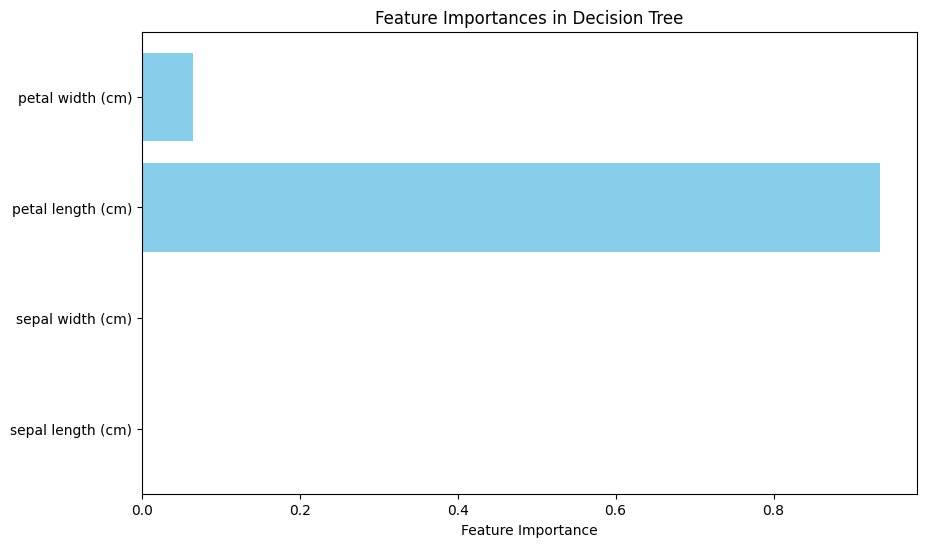

In [99]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importances in Decision Tree")
plt.show()

<!-- - [x] Log the visualization to the Weights and Biases run:
  - Note that `wandb.log()` accepts a dictionary with any properties you want to provide so name the property whatever you'd like.
  - For the value, use the utility function `wandb.Image()` and pass it the plot object. -->


In [100]:
# wandb.log({"feature_importance":wandb.Image(plt)})

plt.savefig('feature_importance.png')
wandb.log({"feature_importance": wandb.Image(plt)})

<Figure size 640x480 with 0 Axes>

<!-- <details>
<summary>Solution:</summary>

```python
wandb.log({"feature_importance": wandb.Image(plt)})
```

</details> -->


<!-- ### Confusion Matrix -->


<!-- As with the feature importance image, we can log the confusion matrix of the classification predictions as well: -->


<!-- - [x] Generate and log a confusion matrix: -->


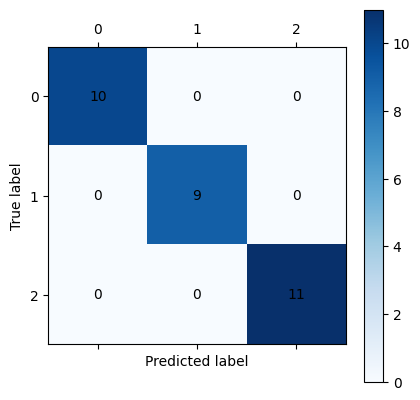

<Figure size 640x480 with 0 Axes>

In [101]:
# Create a confusion matrix using the predictions and labels

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], va="center", ha="center")

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Log the confusion matrix as an image

wandb.log({"confusion_matrix":wandb.Image(plt)})


<!-- ## Explore the W&B Dashboard -->


<!-- - [x] Use the W&B dashboard to explore and analyze your results: -->


<!-- ### Instructions -->


<!-- 1. **Navigate to the W&B Dashboard**:

   - After running your code, click the link provided in the notebook's output to view your experiment on the W&B dashboard.

2. **Examine Your Run**:

   - Look at the metrics logged during the run. Note how they change over epochs or different runs.

3. **Compare Runs**:

   - If you have multiple runs, use the "Compare Runs" feature to analyze differences in metrics and configurations.

4. **Create Custom Panels**:
   - Try creating custom panels to visualize specific metrics over time. This helps in identifying trends and insights. -->


<!-- ## Finalize W&B Run -->


<!-- - [ ] End the W&B run with `wandb.finish` to ensure all data is logged and the session is closed properly: -->


In [102]:
# Finish the run
wandb.finish()

accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,1.0
f1_score,1.0
precision,1.0
recall,1.0


<!-- <details>
<summary>Solution:</summary>

```python
wandb.finish()
```

</details> -->


<!-- ## Hyperparameter Sweeps -->


<!-- Weights and Biases also allows you to perform hyperparameter sweeps to find the optimal model parameters.

- [x] Create a hyperparameter sweep:
  - In the configuration, set the method to "grid" (i.e. set up a grid search)
  - Create a grid of hyperparameters to test:
    - Try different values of `max_depth` for example -->


In [103]:
sweep_id = wandb.sweep(
    {
        "method": "grid",
        "parameters": {
            "max_depth": {"values": [3, 5, 7]},
        },
    },
    project="experiment-tracking-example",
)

Create sweep with ID: tbfeo4ku
Sweep URL: https://wandb.ai/grysu_kuza-gk-inc/experiment-tracking-example/sweeps/tbfeo4ku


<!-- <details>
<summary>Solution:</summary>

```python
sweep_id = wandb.sweep(
    {
        "method": "grid",
        "parameters": {
            "max_depth": {"values": [3, 5, 7]},
        },
    },
    project="experiment-tracking-example",
)
```

</details> -->


<!-- - [x] Define the training loop, using variables stored by the `wandb.config`:
  - Note the use of Python's [`with...as` syntax](<(https://docs.python.org/3/reference/compound_stmts.html#the-with-statement)>) — using this automatically initializes and finishes the for the execution of that block.
  - Set max_depth to `wandb.config.max_depth`
    - Weights and Biases will automatically take care of running the train function multiple times — passing in a different value every time — once we execute the sweep in the next cell.
  - Log the resulting accuracy score. -->


In [104]:
def train():
    with wandb.init() as run:
        model = DecisionTreeClassifier(
            max_depth=wandb.config["max_depth"],
            random_state=42,
        )

        # Train, predict, and evaluate
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        wandb.log({"accuracy": accuracy})

<!-- <details>
<summary>Solution:</summary>

```python
def train():
    with wandb.init() as run:
        model = DecisionTreeClassifier(
            max_depth=wandb.config.max_depth,
            random_state=42,
        )

        # Train, predict, and evaluate
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        wandb.log({"accuracy": accuracy})
```

</details> -->


<!-- - [x] Finally, run the sweep: -->


In [105]:
wandb.agent(sweep_id, train, count=3)

wandb: Agent Starting Run: k4v2ry0g with config:
wandb: 	max_depth: 3
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
accuracy,1.0


wandb: Agent Starting Run: v1ws083k with config:
wandb: 	max_depth: 5
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
accuracy,1.0


wandb: Agent Starting Run: bvlz4ump with config:
wandb: 	max_depth: 7
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
accuracy,1.0


<!-- In this setup:

- The sweep iterates over combinations of max_depth and min_samples_split.
- Each run is logged separately in the W&B dashboard.

Final step:

- [x] You should analyze the runs to find the configuration that yields the best accuracy. -->


<!-- ## 🚦 Checkpoint: Stop -->


<!-- - [x] Uncomment this code
- [x] Complete the feedback form
- [x] Run the cell to log your responses and record your stop time: -->


In [106]:
# deep_atlas.log_feedback(
#     {
#         # How long were you actively focused on this section? (HH:MM)
#         "active_time": "00:30",
#         # Did you feel finished with this section (Yes/No):
#         "finished": "yes",
#         # How much did you enjoy this section? (1–5)
#         "enjoyment": 4,
#         # How useful was this section? (1–5)
#         "usefulness": 4,
#         # Did you skip any steps?
#         "skipped_steps": "no",
#         # Any obvious opportunities for improvement?
#         "suggestions": [],
#     }
# )
# deep_atlas.log_stop_time()

<!-- ## You did it! -->


<!-- In this exercise, we explored how to integrate Weights & Biases for tracking machine learning experiments using scikit-learn. We logged metrics, visualized results, performed hyperparameter sweeps, and interacted with the W&B dashboard to gain insights. -->


<!-- ### Extra Credit -->


<!-- Explore the following advanced W&B features to deepen your understanding and enhance your experiment tracking capabilities:

1. **W&B Reports**:

   - Create detailed reports using W&B's report feature to summarize your experiments, findings, and conclusions. This is useful for sharing insights with your team.

2. **Dataset Versioning**:

   - Use W&B Artifacts to version and track datasets used in your experiments. This helps ensure reproducibility and transparency.

3. **Collaborative Projects**:

   - Explore W&B's collaborative features to share projects with peers and work together on analyses and model improvements.

4. **Real-time Alerts**:
   - Set up real-time alerts for when certain metrics reach specific thresholds, allowing you to monitor model training progress efficiently. -->


<!-- ### Resources -->


<!-- - [W&B Documentation](https://docs.wandb.ai/)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/user_guide.html) -->
